<a href="https://colab.research.google.com/github/sujin421/text-mining-project/blob/main/TM_project_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import time
import re
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter

In [2]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Hannanum
from konlpy.tag import Okt

In [3]:
import pickle
with open('data/reviews1.pkl', 'rb') as f:
    reviews1 = pickle.load(f)
with open('data/reviews2.pkl', 'rb') as f:
    reviews2 = pickle.load(f)
with open('data/reviews3.pkl', 'rb') as f:
    reviews3 = pickle.load(f)
with open('data/reviews4.pkl', 'rb') as f:
    reviews4 = pickle.load(f)

In [4]:
# 각 산업군별 리뷰 개수 확인
print(len(reviews1), len(reviews2), len(reviews3), len(reviews4))

775 1065 343 375


In [5]:
#특수문자 제거
def sub(dic):
    dic = [re.sub(r"[^가-힣A-Za-z0-9]", " ", str(content)) for content in dic]
    return dic

In [6]:
#산업군 별 키워드 추출 후 리스트 생성
def extend(text):
    kkma = Kkma()
    temp = []
    for i in text:
        temp.extend(kkma.nouns(i))
    return temp

In [7]:
Goverment = extend(sub(reviews1))
Bank = extend(sub(reviews2))
IT = extend(sub(reviews3))
Accounting = extend(sub(reviews4))

In [8]:
print(len(Goverment), len(Bank), len(IT), len(Accounting))

6934 9685 3095 3008


In [9]:
vocab_stopwords = ['있음','기업','업무','회사','직장','분위기','사람','직원','근무']

In [22]:
def cnt(title):

    for i,v in enumerate(title):
        if len(v)<2:
            title.pop(i)
    
    for i,v in enumerate(title):
        if v in vocab_stopwords:
            title.pop(i)
    
    count=Counter(title)

    words = dict(count.most_common(50))
    return words

In [25]:
Goverment_vocab = cnt(Goverment)

In [26]:
Goverment_vocab

{'기관': 98,
 '경험': 59,
 '공공': 56,
 '공공기관': 54,
 '공무원': 53,
 '생각': 49,
 '계약직': 43,
 '복지': 42,
 '다양': 40,
 '문화': 37,
 '환경': 36,
 '조직': 33,
 '안정적': 30,
 '추천': 28,
 '가능': 27,
 '급여': 27,
 '보장': 23,
 '장점': 23,
 '정규직': 23,
 '강도': 22,
 '경력': 22,
 '공기업': 22,
 '자기': 21,
 '워라밸': 20,
 '관련': 19,
 '시간': 19,
 '부서': 18,
 '자유': 18,
 '연봉': 18,
 '사회': 18,
 '발전': 18,
 '만족': 17,
 '사업': 17,
 '워라벨': 16,
 '지역': 16,
 '단점': 16,
 '체계': 16,
 '위치': 16,
 '지원': 15,
 '서울': 15,
 '하나': 15,
 '눈치': 14,
 '보수적': 14,
 '느낌': 14,
 '생활': 14,
 '본인': 14,
 '때문': 14,
 '특성': 13,
 '월급': 13,
 '지방': 13}

In [27]:
Bank_vocab = cnt(Bank)

In [28]:
Bank_vocab

{'문화': 71,
 '연봉': 68,
 '생각': 57,
 '성장': 56,
 '복지': 48,
 '추천': 47,
 '다양': 46,
 '업계': 43,
 '발전': 40,
 '금융': 39,
 '안정적': 39,
 '경험': 37,
 '은행': 37,
 '보수적': 37,
 '급여': 37,
 '최고': 35,
 '경력': 32,
 '대우': 30,
 '하나': 30,
 '가능': 28,
 '환경': 28,
 '가능성': 27,
 '자유': 27,
 '시간': 26,
 '본인': 26,
 '보험': 26,
 '워라밸': 25,
 '커리어': 25,
 '조직': 25,
 '대표': 25,
 '강도': 24,
 '규모': 24,
 '투자': 23,
 '능력': 23,
 '신입': 23,
 '기회': 22,
 '운영': 22,
 '체계': 22,
 '야근': 21,
 '만큼': 21,
 '개인': 21,
 '영업': 21,
 '운용': 20,
 '장점': 20,
 '수준': 20,
 '외국계': 20,
 '성과': 20,
 '지원': 19,
 '수평적': 19,
 '정도': 19}

In [29]:
IT_vocab = cnt(IT)

In [30]:
IT_vocab

{'추천': 25,
 '경험': 24,
 '다양': 23,
 '개발': 23,
 '성장': 23,
 '복지': 20,
 '자유': 18,
 '환경': 16,
 '사업': 16,
 '연봉': 15,
 '대우': 14,
 '문화': 13,
 '통신': 13,
 '자기': 13,
 '체계': 13,
 '개발자': 12,
 '생각': 12,
 '스타트': 11,
 '스타트업': 11,
 '업체': 11,
 '안정적': 11,
 '업계': 10,
 '가능': 10,
 '발전': 10,
 '진행': 10,
 '가지': 9,
 '대표': 9,
 '노력': 8,
 '커리어': 8,
 '대기업': 8,
 '워라벨': 8,
 '시간': 8,
 '서비스': 7,
 '유지': 7,
 '본인': 7,
 '수평적': 7,
 '개인': 7,
 '경력': 7,
 '수준': 7,
 '나름': 7,
 '신입': 7,
 '월급': 7,
 '사원': 7,
 '중소기업': 7,
 '부족': 7,
 '비전': 7,
 '네트워크': 7,
 '자체': 7,
 '운영': 7,
 '경우': 7}

In [31]:
Accounting_vocab = cnt(Accounting)

In [32]:
Accounting_vocab

{'다양': 33,
 '회계': 31,
 '사무실': 30,
 '신입': 29,
 '세무': 27,
 '세무사': 26,
 '추천': 25,
 '법인': 22,
 '경험': 20,
 '회계사': 20,
 '복지': 20,
 '경력': 18,
 '거래처': 18,
 '자유': 16,
 '야근': 16,
 '생각': 15,
 '입사': 14,
 '개인': 13,
 '환경': 12,
 '급여': 12,
 '업종': 11,
 '배우기': 11,
 '문화': 10,
 '퇴사': 10,
 '업체': 10,
 '회계법인': 9,
 '대우': 9,
 '배우': 9,
 '하나': 9,
 '정도': 9,
 '처음': 9,
 '위치': 8,
 '가능': 8,
 '체계': 8,
 '연봉': 8,
 '기장': 7,
 '지점': 7,
 '전문': 7,
 '지식': 7,
 '꼰대': 7,
 '가족': 7,
 '이상': 6,
 '발전': 6,
 '전체적': 6,
 '느낌': 6,
 '시간': 6,
 '부족': 6,
 '최악': 6,
 '가지': 5,
 '업무량': 5}

In [39]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

[]

In [40]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib 
from matplotlib import rc

path ='a프로젝트.ttf'
font_name=fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

KoreanPRJTR


# Word Cloud 

In [33]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib 
from matplotlib import rc
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator
 
def wcloud(imagetext, text):
    icon = Image.open(imagetext)
    icon_coloring = np.array(icon)
    image_color = ImageColorGenerator(icon_coloring)
    mask = Image.new("RGB", icon.size, (255,255,255))
    mask.paste(icon,icon)
    mask = np.array(mask)

    wc = WordCloud(font_path = 'a프로젝트.ttf', 
                   background_color = 'white',    # 배경색
                   width = 1500, height = 1000,   # 사이즈설정 
                   mask = mask                    # 마스크설정  
                   )                          
 
    cloud = wc.generate_from_frequencies(text)   # 사전형태의 데이터
    plt.figure(figsize=(10,10))                  # 액자사이즈설정
    plt.axis('off')                              # 테두리 선 없애기
    plt.imshow(cloud,interpolation="bilinear")
    plt.imshow(wc.recolor(color_func=image_color))

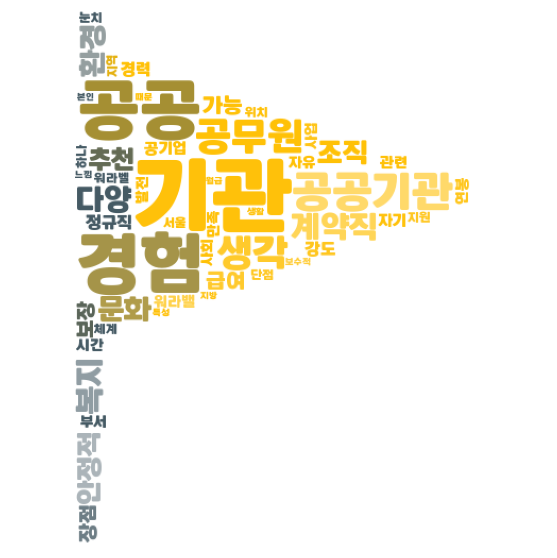

In [34]:
wcloud("image/govermentimage.png", Goverment_vocab)

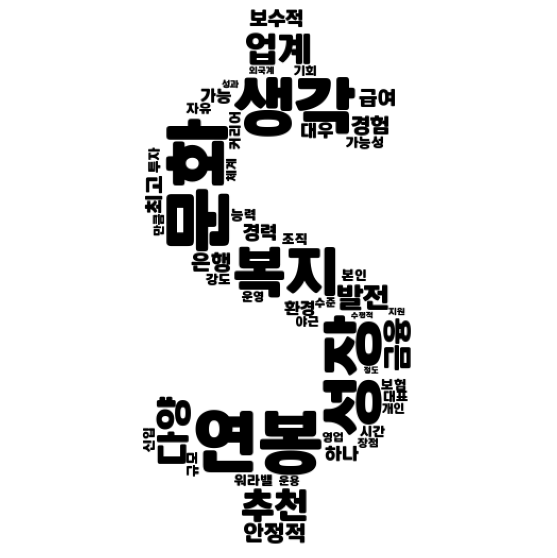

In [35]:
wcloud("image/bankimage.png",Bank_vocab)

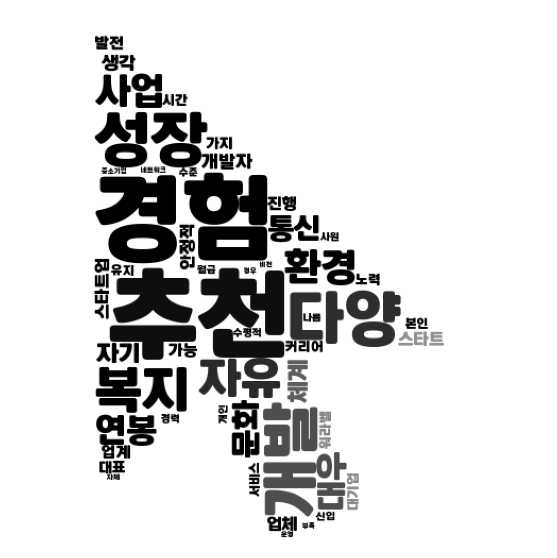

In [36]:
wcloud("image/itimage.png",IT_vocab)

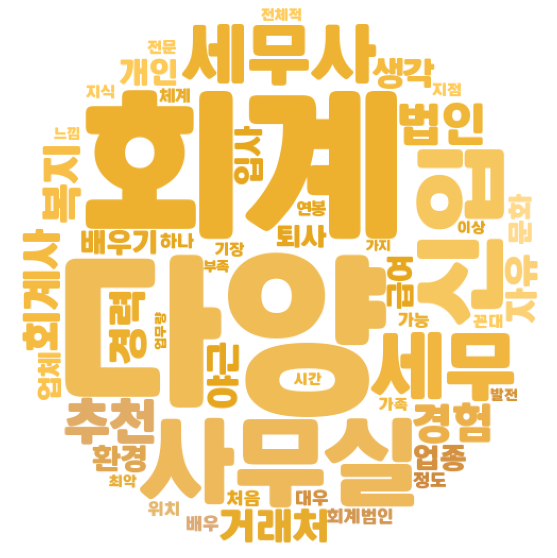

In [37]:
wcloud("image/accountingimage.png",Accounting_vocab)